In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=500,cluster_std=1)
data2, label2 = make_blobs(n_samples=500,cluster_std=5)

Let's split the datasets into train and test.

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data1, label1, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(data2, label2, test_size=0.2)


In [0]:
#label1

Plot the first dataset with standard deviation 1.

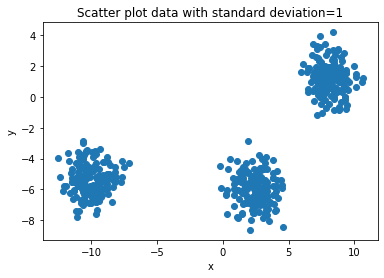

In [0]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 4.

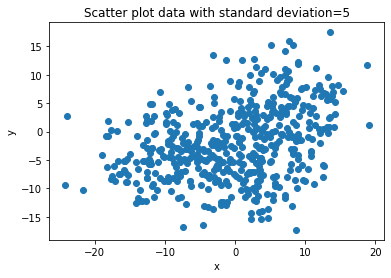

In [0]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [0]:
clf = GaussianNB() 
clf.fit(X1_train, y1_train)
# code comes here
# code comes here

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf2=LogisticRegression()
clf2.fit(X1_train,y1_train)
# code comes here
# code comes here

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [0]:
# Predict
pred=clf.predict(X1_test)
print("Classification Report for Naive Bayesian:")
print(classification_report(pred,y1_test))
print(confusion_matrix(y1_test,pred))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[28  0  0]
 [ 0 41  0]
 [ 0  0 31]]


In [0]:
# Predict
pred2=clf2.predict(X1_test)
print("Classification Report for Logistic Regression:")
print(classification_report(pred2,y1_test))
print(confusion_matrix(y1_test,pred2))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[28  0  0]
 [ 0 41  0]
 [ 0  0 31]]


In [0]:
clf3 = GaussianNB() 
clf3.fit(X2_train, y2_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
clf4=LogisticRegression()
clf4.fit(X2_train,y2_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:

# Predict
pred3=clf3.predict(X2_test)
print("Classification Report for Naive Bayesian:")
print(classification_report(pred3,y2_test))
print(confusion_matrix(y2_test,pred3))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.80      0.65      0.71        31
           1       0.61      0.71      0.66        28
           2       0.88      0.90      0.89        41

    accuracy                           0.77       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.78      0.77      0.77       100

[[20  5  0]
 [ 9 20  4]
 [ 2  3 37]]


In [0]:
# Predict
pred4=clf4.predict(X2_test)
print("Classification Report for Logistic Regression:")
print(classification_report(pred4,y2_test))
print(confusion_matrix(y2_test,pred4))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.58      0.68      0.62        28
           2       0.88      0.90      0.89        41

    accuracy                           0.75       100
   macro avg       0.74      0.73      0.73       100
weighted avg       0.76      0.75      0.75       100

[[19  6  0]
 [10 19  4]
 [ 2  3 37]]


### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)


# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [0]:

path = "/content/gdrive/My Drive/Colab Notebooks/News_Category_Dataset_v2.json"
df=pd.read_json(path, lines=True)


## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [0]:
new_df['category'].value_counts()

POLITICS         7998
WELLNESS         4459
ENTERTAINMENT    4050
TRAVEL           2456
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']



### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words='english')
X_train_counts = count_vect.fit_transform(X)


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)


Split train and test data

In [0]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X_train_tf, y, test_size=0.2)
 # code comes here

print("Size of train data:")
print(X3_train.shape)

print("Size of val data:")
print(X3_test.shape)
print("Size of val data:")
print(y3_train.shape)
print("Size of val data:")
print(y3_test.shape)


Size of train data:
(15170, 29829)
Size of val data:
(3793, 29829)
Size of val data:
(15170,)
Size of val data:
(3793,)


In [0]:
#X_test_counts = count_vect.transform(new_df)
#X_test_tf = tfidf_transformer.transform(X_test_counts)

### Gaussian Naive Bayesian

In [0]:
clf5 = GaussianNB() 
clf5.fit(X3_train.toarray(), y3_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predict
pred5=clf5.predict(X3_test.toarray())
print("Classification Report for Naive Bayesian:")
print(classification_report(pred5,y3_test))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1532
           1       0.65      0.71      0.68       853
           2       0.71      0.66      0.69       878
           3       0.63      0.57      0.60       530

    accuracy                           0.71      3793
   macro avg       0.69      0.68      0.68      3793
weighted avg       0.71      0.71      0.70      3793



In [0]:
print(confusion_matrix(y3_test,pred5))

[[1190  114  193   69]
 [ 155  604   66  104]
 [ 119   65  583   57]
 [  68   70   36  300]]


### 6) Logistic Regression

In [0]:
clf6=LogisticRegression()
clf6.fit(X3_train.toarray(),y3_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred6=clf6.predict(X3_test.toarray())
print("Classification Report for Logistic Regression:")
print(classification_report(pred6,y3_test))
print(confusion_matrix(y3_test,pred6))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1688
           1       0.89      0.89      0.89       925
           2       0.85      0.89      0.87       788
           3       0.76      0.92      0.83       392

    accuracy                           0.89      3793
   macro avg       0.86      0.90      0.88      3793
weighted avg       0.90      0.89      0.89      3793

[[1503   25   29    9]
 [  66  825   26   12]
 [  81   33  698   12]
 [  38   42   35  359]]


### Observe Logistic Regression is much slower but more accurate. Discuss.

 We evaluated the performance of Logistic Regression and Bayes classifiers (Gaussian Naïve Bayes and Gaussian Bayes with general and shared covariance matrices) on the 4 topics of news dataset. Since the dataset is not artificial, real datasets can never be perfectly independent. So we have obtained the best results with the Logistic Regression classifier , giving an accuracy of 89% on test data, while Naive Bayesian score was 71%. Dissimilarly, in question 2 Logistic Regression works better. Because, when there are correlated features logistic regression will obtain a more accurate probability than Naïve Bayes.

 Alper Bingol 23661
 





